## **TEXT PRE-PROCESSING**

- We want to do sentiment analysis with **static embeddings** + **classic ML models** or **Recurrent Neural Networks**
- In this notebook i'm going to preprocess the text and create a subset of 500K instances.
- I've imported the dataset from google drive (https://drive.google.com/drive/folders/0Bz8a_Dbh9Qhbfll6bVpmNUtUcFdjYmF2SEpmZUZUcVNiMUw1TWN6RDV3a0JHT3kxLVhVR2M?resourcekey=0-TLwzfR2O-D2aPitmn5o9VQ)
- First thing i'm going to do is to install the libraries



In [ ]:
!pip install -q gdown

In [ ]:
fileid = '0Bz8a_Dbh9QhbZVhsUnRWRDhETzA'
outputname = 'amazon_review_full_csv.tar.gz'

!gdown --id {fileid} -O {outputname}

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=0Bz8a_Dbh9QhbZVhsUnRWRDhETzA
From (redirected): https://drive.google.com/uc?id=0Bz8a_Dbh9QhbZVhsUnRWRDhETzA&confirm=t&uuid=c0b68caa-b53b-4698-9198-86f65bcaf405
To: /content/amazon_review_full_csv.tar.gz
100% 644M/644M [00:08<00:00, 76.2MB/s]


In [ ]:
import tarfile
with tarfile.open(outputname, "r:gz") as tar:
  tar.extractall("Dataset")

In [ ]:
!ls -R Dataset/

Dataset/:
amazon_review_full_csv

Dataset/amazon_review_full_csv:
readme.txt  test.csv  train.csv


In [ ]:
!pip install gensim nltk scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

In [ ]:
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.8 MB/s eta 0:00:00


### **Text Pre-processing:**

1.   Import the libraryes

**VERSION I**

3. Lowercasing
4. Remove punctuation and numbers
4. Remove stopwords
6. Lemmatization

**VERSION II**

7. It does all the things from **Version I**
8. Replaces punctuation and emoticons with special tokens.
9. Contracted forms
10. All_caps token, for maiusc words and phrases




In [ ]:
import pandas as pd
import string
import re
import nltk
import contractions
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df_train = pd.read_csv(
    './Dataset/amazon_review_full_csv/train.csv',
    header=None,
    names=['Rating', 'Title', 'Review'],
    quotechar='"',
    doublequote=True,
    escapechar='\\',
    engine='python',
    encoding='utf-8',
    on_bad_lines='skip'
)

df_train.head(10)

,Rating,Title,Review
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...
5,5,There's a reason for the price,"There's a reason this CD is so expensive, even..."
6,1,Buyer beware,"This is a self-published book, and if you want..."
7,4,"Errors, but great story",I was a dissapointed to see errors on the back...
8,1,The Worst!,A complete waste of time. Typographical errors...
9,1,Oh please,I guess you have to be a romance novel lover f...


In [ ]:
#I CREATE ONE COLUMN: TITLE + REVIEW --> TEXt
df_train["Text"] = df_train["Title"].fillna("") + " " + df_train["Review"].fillna("")
df_train = df_train[["Text", "Rating"]]
df_train.head(10)

,Text,Rating
0,more like funchuck Gave this to my dad for a g...,3
1,Inspiring I hope a lot of people hear this cd....,5
2,The best soundtrack ever to anything. I'm read...,5
3,Chrono Cross OST The music of Yasunori Misuda ...,4
4,Too good to be true Probably the greatest soun...,5
5,There's a reason for the price There's a reaso...,5
6,"Buyer beware This is a self-published book, an...",1
7,"Errors, but great story I was a dissapointed t...",4
8,The Worst! A complete waste of time. Typograph...,1
9,Oh please I guess you have to be a romance nov...,1


### **ORIGINAL DATASET STUDY:**

- The original dataset has train.csv and test.csv, i'm working only on train.csv
- info on the dataset, null values and duplicates, distribution of the data (perfectly balanced)
- some statistics on the text (reviews), standard deviation (high variability in text length)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999746 entries, 0 to 2999745
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Text    object
 1   Rating  int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ MB


In [ ]:
df_train.isnull().sum()
df_train['Text'].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()

np.int64(0)

In [ ]:
df_train['Rating'].value_counts(normalize=True)

,proportion
Rating,
4,0.200005
5,0.200005
1,0.199999
3,0.199997
2,0.199995


In [ ]:
df_train['text_len'] = df_train['Text'].apply(lambda x: len(str(x).split()))
df_train['text_len'].describe()

,text_len
count,2.999746e+06
mean,8.017872e+01
std,4.326109e+01
min,2.000000e+00
25%,4.400000e+01
50%,7.200000e+01
75%,1.110000e+02
max,4.410000e+02


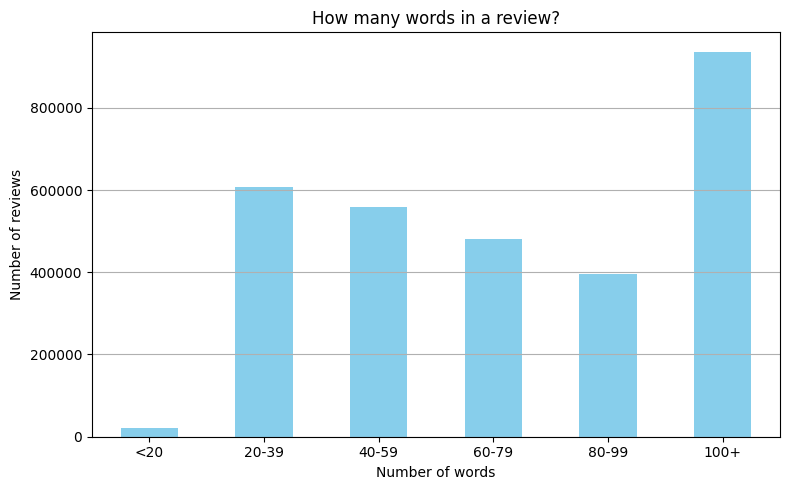

In [ ]:
#BAR-CHAR TO SEE HOW MANY WORDS FOR EACH REVIEW

import matplotlib.pyplot as plt

bins = [0, 20, 40, 60, 80, 100, float('inf')]
labels = ['<20', '20-39', '40-59', '60-79', '80-99', '100+']

df_train['length_bin'] = pd.cut(df_train['text_len'], bins=bins, labels=labels, right=False)

bin_counts = df_train['length_bin'].value_counts().sort_index()

#BARCHAR
plt.figure(figsize=(8, 5))
bin_counts.plot(kind='bar', color='skyblue')
plt.title('How many words in a review?')
plt.xlabel('Number of words')
plt.ylabel('Number of reviews')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### **VERSION I OF THE TEXT PROCESSING FUNCTION**

In [ ]:
#OLD STUFF - VV.1 of the Text Preprocessing function

'''
stop_words = set(stopwords.words('english'))

# Words that are considered stopwords but i don't want to remove
important_words = {
    "not", "no", "nor", "never", "none", "nobody", "nothing", "neither", "nowhere",
    "don’t", "doesn’t", "didn’t", "can’t", "couldn’t", "won’t", "wouldn’t",
    "shouldn’t", "wasn’t", "weren’t", "isn’t", "aren’t", "hasn’t", "haven’t", "hadn’t",
    "cannot", "without", "hardly", "barely", "rarely", "scarcely"
}
stop_words = stop_words - important_words

def cleaning1(text):
    # Convert all the text to lowercase (optional)
    text = str(text).lower()

    # Replace multiple ! and ? with only one occurrency!
    text = re.sub(r'[!]{2,}', '!', text)  # OK !!! --> ok !
    text = re.sub(r'[?]{2,}', '?', text)  # Are you ok??? --> are you ok?

    # Remove any special characters except for a single ! or ?
    # It avoids emoticons, urls ecc... (WATCH AGAIN LATER)
    text = re.sub(r'[^a-z0-9\s!?]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

#df_train['Text'] = df_train['Text'].apply(cleaning1)
#df_test['Text'] = df_test['Text'].apply(cleaning1)


#df_train.head(10)
'''

### **VERSION II OF THE TEXT PROCESSING FUNCTION**

In [1]:
#Stopwords
stop_words = set(stopwords.words('english'))

#List of words that could be considered stopwords but i don't want to remove them, maybe they're usefull for sentiment
important_words = {
    "not", "no", "nor", "never", "none", "nobody", "nothing", "neither", "nowhere",
    "don’t", "doesn’t", "didn’t", "can’t", "couldn’t", "won’t", "wouldn’t",
    "shouldn’t", "wasn’t", "weren’t", "isn’t", "aren’t", "hasn’t", "haven’t", "hadn’t",
    "cannot", "without", "hardly", "barely", "rarely", "scarcely",
    "dont", "doesnt", "didnt", "cant", "couldnt", "wont", "wouldnt",
    "shouldnt", "wasnt", "werent", "isnt", "arent", "hasnt", "havent", "hadnt"
}
stop_words = stop_words - important_words

def replace_emotional_tokens(text):
    #Punctuation
    text = re.sub(r'\.{3,}', ' ELLIPSIS ', text)
    text = re.sub(r'!{3,}', ' STRONG_EXCLAMATION ', text)
    text = re.sub(r'!{1,2}', ' EXCLAMATION_MARK ', text)
    text = re.sub(r'\?{3,}', ' STRONG_QUESTION ', text)
    text = re.sub(r'\?{1,2}', ' QUESTION_MARK ', text)
    text = re.sub(r'(!\?|\?!|\?!+|!\?+)', ' SURPRISE ', text)

    #textual emoji and unicode-based emoji's
    text = re.sub(r'(:\)|:-\)|\(:)', ' HAPPY ', text)
    text = re.sub(r'(:\(|:-\(|\):)', ' SAD ', text)
    text = re.sub(r'(>:?\(|>:\[)', ' ANGRY ', text)
    text = re.sub(r'[🙂😊😀😄😃]', ' HAPPY ', text)
    text = re.sub(r'[😢😭🙁☹️]', ' SAD ', text)
    text = re.sub(r'[😠😡🤬]', ' ANGRY ', text)

    return text

#maiusc words
def mark_all_caps_words(text):
    def replace_caps(match):
        word = match.group()
        return f'{word.lower()} ALL_CAPS'

    return re.sub(r'\b[A-Z]{2,}\b', replace_caps, text)

def cleaning1(text):
    #contractions
    text = str(text)
    text = contractions.fix(text)

    #recall the function all_caps
    text = mark_all_caps_words(text)

    #lowercasing
    text = text.lower()

    #remove URL and mentions
    text = re.sub(r"http\S+|www\S+|@\w+", "", text)

    #Replace the punctuations and the emojis with special tokens
    text = replace_emotional_tokens(text)

    #Remove useless elements
    text = re.sub(r'[^a-z0-9\s_]+', '', text)
    text = re.sub(r'\d+', '', text)

    #Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

NameError: name 'stopwords' is not defined

#### **LEMMATIZATION FUNCTION**

- i use the SpaCy lemmatizer



In [ ]:
nlp = spacy.load("en_core_web_sm")

#LEMMATIZATION FUNCTION

def lemmatize_text(text):
    #spacy
    doc = nlp(str(text))
    return " ".join([token.lemma_ for token in doc])


### **CREATE A SUB-SET OF 500K INSTANCES**

- Here has been applyed a new text-processing function (The Version II) that should be better than the one before.
- On this dataset i applyed the cleaning function and the lemmatizer
- I saved the result on my google drive: the subset not preprocessed and the subset preprocessed


In [ ]:
df_v2= df_train.sample(n=500000, random_state=42)

In [ ]:
df_v2.shape


(500000, 3)

In [ ]:
df_v2.head(10)

,Text,Rating,text_len
633552,No Lonesome Dove Lonesome Dove is one of the b...,3,109
2344762,Not I was hoping for Don't expect these to be ...,2,64
736127,roof bag This bag held up good however it is n...,2,26
1295906,Suspensful Truly after reading the reviews wri...,5,117
2790144,Received Broken When my son received this gift...,2,33
1089436,If you are computer literate just a little bit...,1,99
1662432,NOT a Sequel To Iron Monkey! This is a run of ...,2,105
2657972,"Nice read Having read many singer bios, I came...",4,63
2346816,Cheaply made I bought this digital camera for ...,1,127
1638561,"Does It Work For The PS2 OK, let me get this s...",5,49


In [ ]:
df_v2 = df_v2.drop(columns=['text_len'])


In [ ]:
df_v2.head(10)

,Text,Rating
633552,No Lonesome Dove Lonesome Dove is one of the b...,3
2344762,Not I was hoping for Don't expect these to be ...,2
736127,roof bag This bag held up good however it is n...,2
1295906,Suspensful Truly after reading the reviews wri...,5
2790144,Received Broken When my son received this gift...,2
1089436,If you are computer literate just a little bit...,1
1662432,NOT a Sequel To Iron Monkey! This is a run of ...,2
2657972,"Nice read Having read many singer bios, I came...",4
2346816,Cheaply made I bought this digital camera for ...,1
1638561,"Does It Work For The PS2 OK, let me get this s...",5


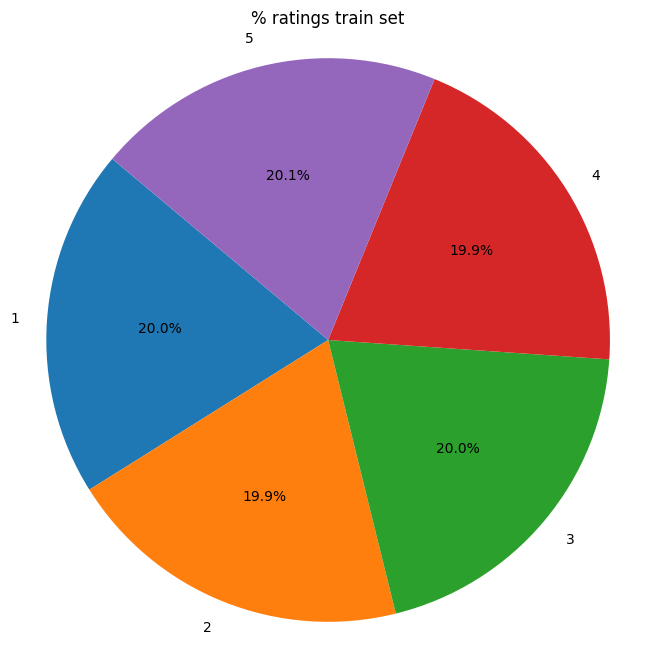

In [ ]:
import matplotlib.pyplot as plt

rating_counts = df_v2['Rating'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('% ratings train set')
plt.axis('equal')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Remove the duplications and the null values
df_v2 = df_v2.drop_duplicates()
df_v2 = df_v2.dropna()

#Save on my drive the not_preprocessed dataset
output_path_np = '/content/drive/MyDrive/DatasetHLT/VV2/dataset_v2_1M_np.csv'
df_v2.to_csv(output_path_np, index=False)

print(f"Versione NON preprocessata salvata in: {output_path_np}")

Versione NON preprocessata salvata in: /content/drive/MyDrive/DatasetHLT/VV2/dataset_v2_1M_np.csv


In [ ]:
#I apply the cleaning-function and the lemmatizer on the 500K instances sub-set

df_v2['Text'] = df_v2['Text'].apply(cleaning1)
df_v2['Text'] = df_v2['Text'].apply(lemmatize_text)

In [ ]:
df_v2.head(20)

,Text,Rating
633552,no lonesome dove lonesome dive one good book e...,3
2344762,not hoping not expect magicali pretty easy too...,2
736127,roof bag bag hold good however not waterproof ...,2
1295906,suspensful truly read review write previous re...,5
2790144,receive broken son receive gift bowl break tel...,2
1089436,computer literate little bit not read may alre...,1
1662432,not all_caps sequel iron monkey run mill hong ...,2
2657972,nice read read many singer bio come across sim...,4
2346816,cheaply make buy digital camera vacation embar...,1
1638561,work ps ok all_caps let get straight yes all_c...,5


In [ ]:
#Save the preprocessd version on my google drive
output_path_p = '/content/drive/MyDrive/DatasetHLT/VV2/dataset_v2_1M_p.csv'
df_v2.to_csv(output_path_p, index=False)

print(f"Versione preprocessata salvata in: {output_path_p}")

Versione preprocessata salvata in: /content/drive/MyDrive/DatasetHLT/VV2/dataset_v2_1M_p.csv
